<center><h1>Sun_Kaiyi_HW2</h1></center>
<br>
<br>


Name: Sun, Kaiyi
<br>
Github Username:KaiyiSss
<br>
USC ID: 6511379529


## 1. Combined Cycle Power Plant Data Set


### (a) Download Data


Package imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsRegressor

Get the Cycle Power Plant Data Set


In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data


#### i. rows and columns


In [3]:
# print (the number of rows, the number of columns) 
print(df.shape)

(9568, 5)


Rows: 9568, Columns: 5

Rows represent the data record of the plant at each hour.

Columns represent four features(AT, V, AP, RH) and one prediction(PE) 

#### ii. pairwise scatterplots of all the varianbles


c:\Users\sunka\OneDrive\桌面\dsci 552\PDF New Homework-8\env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


array([[<AxesSubplot: xlabel='AT', ylabel='AT'>,
        <AxesSubplot: xlabel='V', ylabel='AT'>,
        <AxesSubplot: xlabel='AP', ylabel='AT'>,
        <AxesSubplot: xlabel='RH', ylabel='AT'>,
        <AxesSubplot: xlabel='PE', ylabel='AT'>],
       [<AxesSubplot: xlabel='AT', ylabel='V'>,
        <AxesSubplot: xlabel='V', ylabel='V'>,
        <AxesSubplot: xlabel='AP', ylabel='V'>,
        <AxesSubplot: xlabel='RH', ylabel='V'>,
        <AxesSubplot: xlabel='PE', ylabel='V'>],
       [<AxesSubplot: xlabel='AT', ylabel='AP'>,
        <AxesSubplot: xlabel='V', ylabel='AP'>,
        <AxesSubplot: xlabel='AP', ylabel='AP'>,
        <AxesSubplot: xlabel='RH', ylabel='AP'>,
        <AxesSubplot: xlabel='PE', ylabel='AP'>],
       [<AxesSubplot: xlabel='AT', ylabel='RH'>,
        <AxesSubplot: xlabel='V', ylabel='RH'>,
        <AxesSubplot: xlabel='AP', ylabel='RH'>,
        <AxesSubplot: xlabel='RH', ylabel='RH'>,
        <AxesSubplot: xlabel='PE', ylabel='RH'>],
       [<AxesSubplot: xla

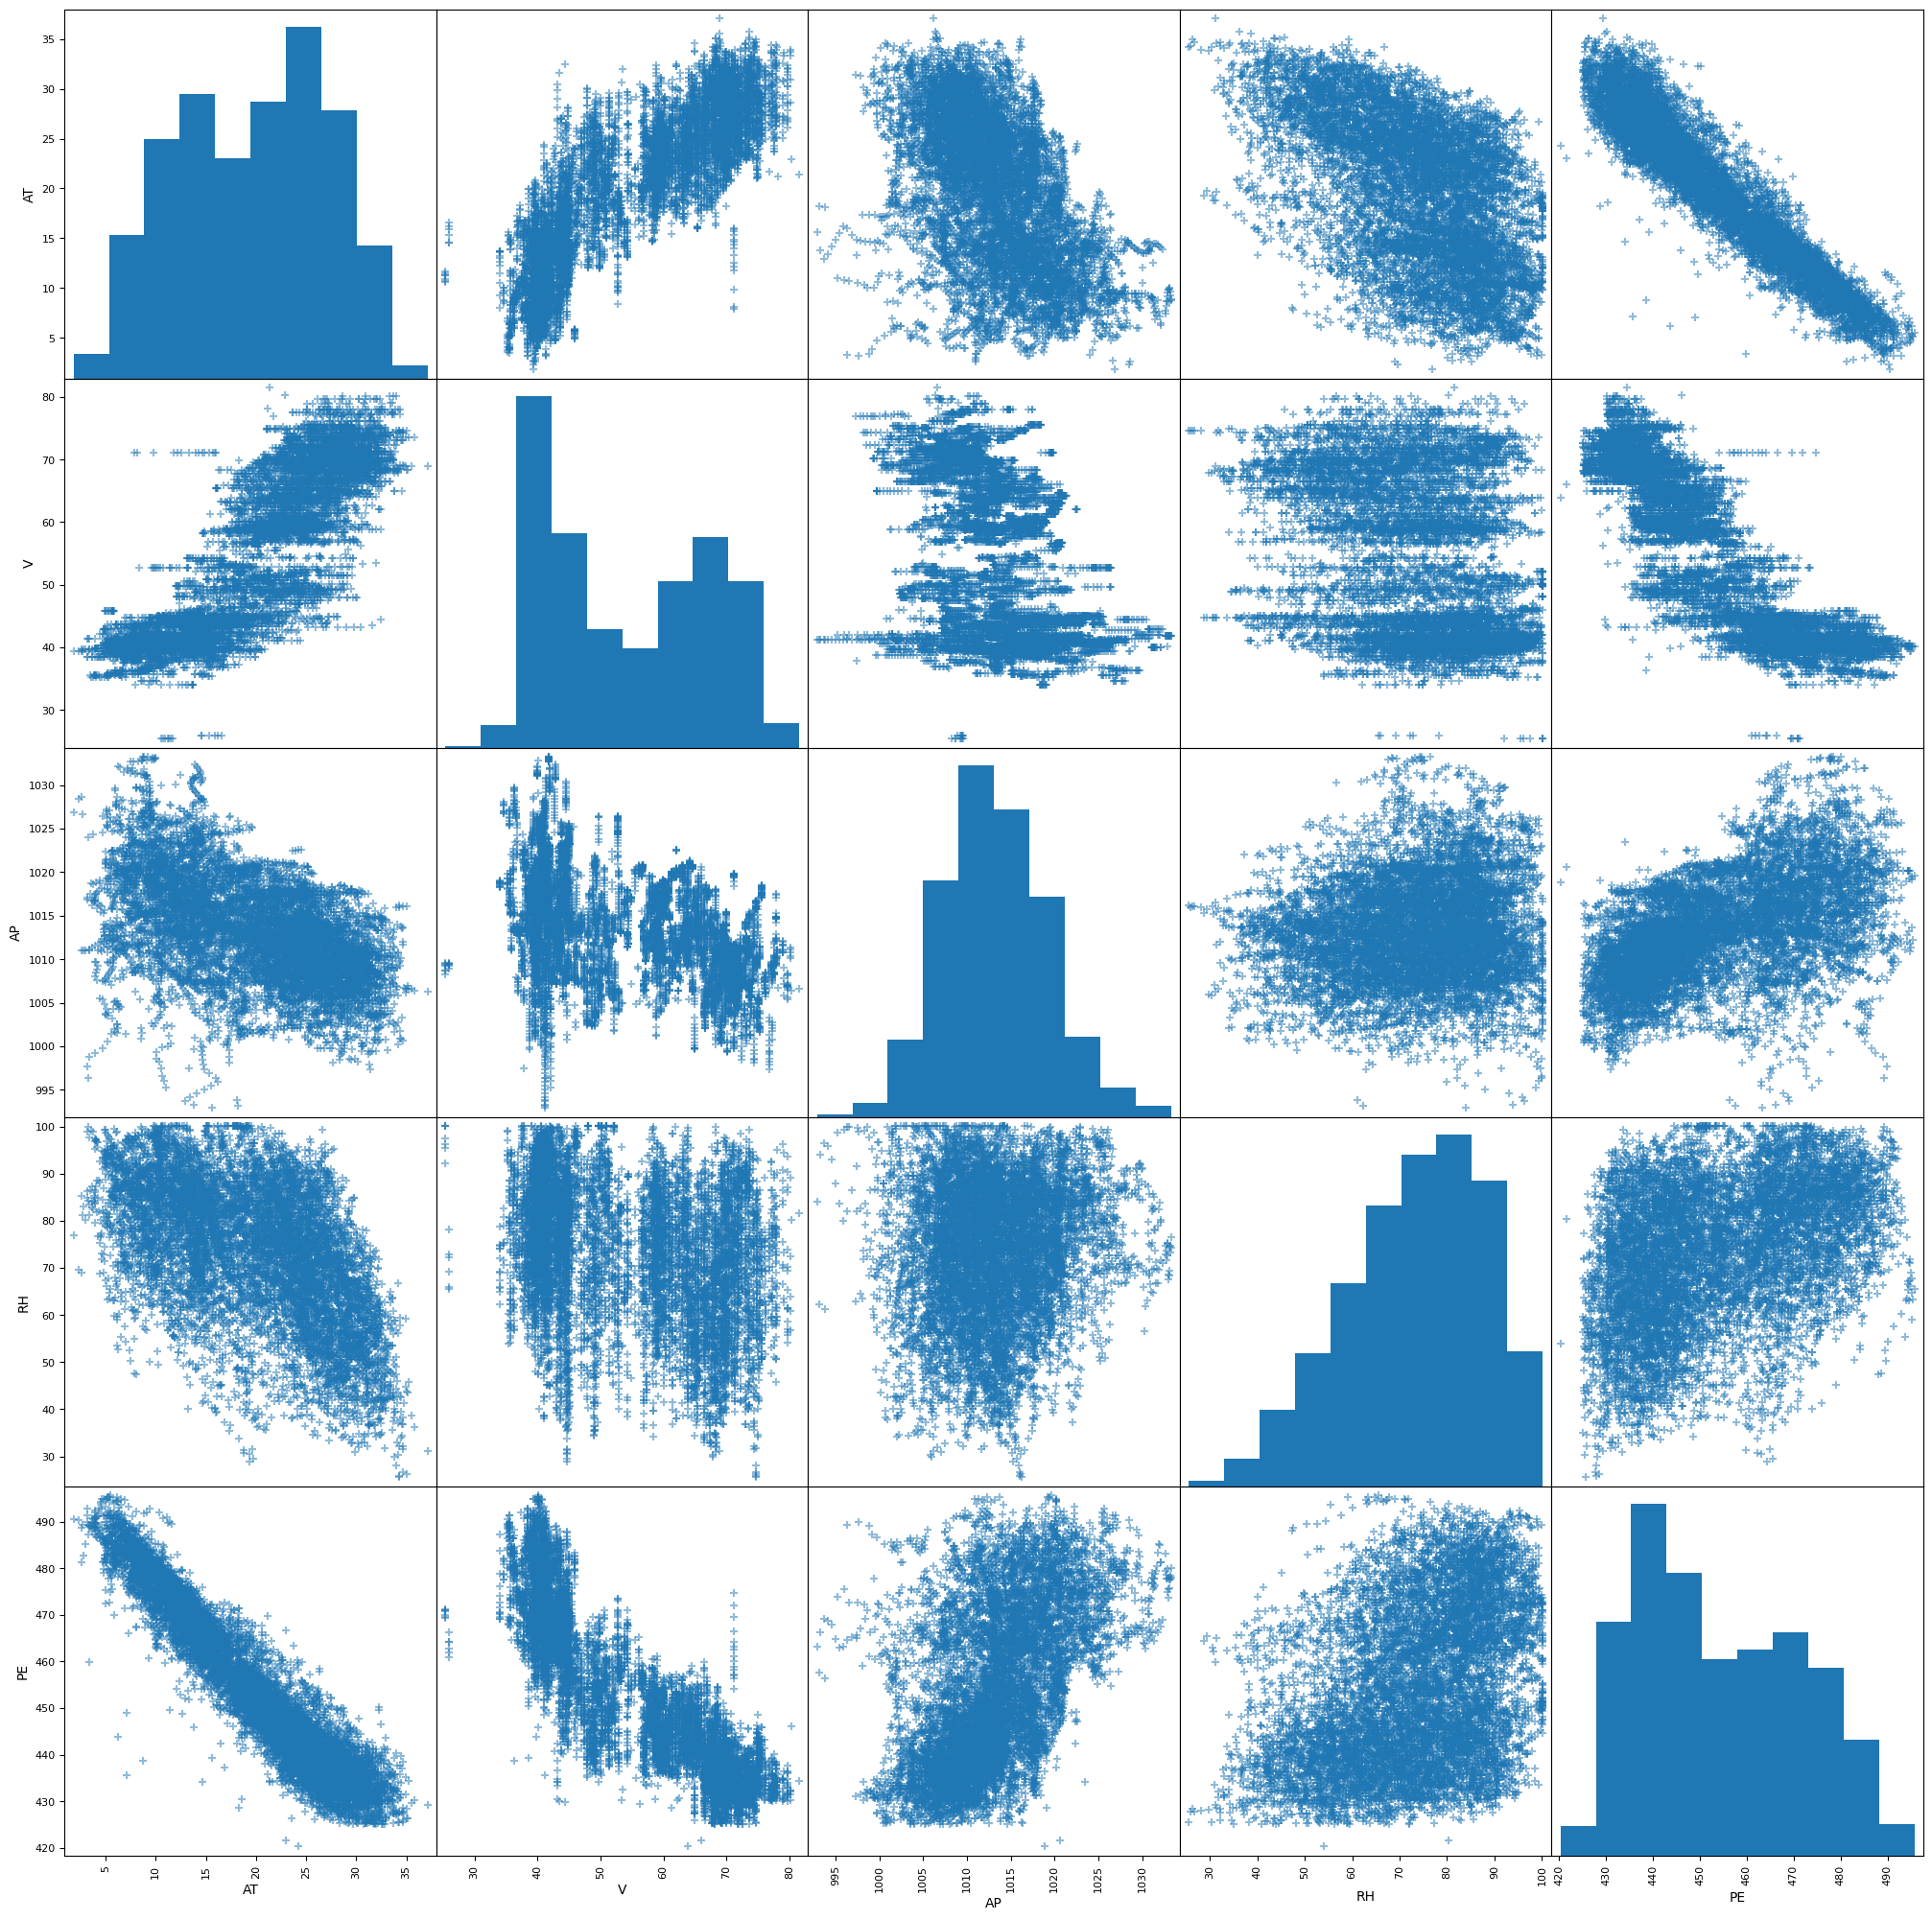

In [4]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(25, 25), marker= '+')

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges


In [5]:
stats_table = df.describe()
stats_table.loc['median'] = [df['AT'].median(), df['V'].median(), df['AP'].median(), df['RH'].median(), df['PE'].median()]
stats_table.loc['interquartile'] = [stats_table.loc['75%', 'AT'] - stats_table.loc['25%', 'AT'], stats_table.loc['75%', 'V'] - stats_table.loc['25%', 'V'], 
                                    stats_table.loc['75%', 'AP'] - stats_table.loc['25%', 'AP'], stats_table.loc['75%', 'RH'] - stats_table.loc['25%', 'RH'],
                                    stats_table.loc['75%', 'PE'] - stats_table.loc['25%', 'PE']]
stats_table


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression


AT

In [6]:
predictor_set = df.iloc[:, 0:4]
response = df.iloc[:, 4]
y = response

# Predictors
x_1 = df['AT']
x_2 = df['V']
x_3 = df['AP']
x_4 = df['RH']

x_1_c = sm.add_constant(x_1)
x_2_c = sm.add_constant(x_2)
x_3_c = sm.add_constant(x_3)
x_4_c = sm.add_constant(x_4)
res_1 = sm.OLS(y, x_1_c).fit()

print(res_1.summary())
y_1_prediction = res_1.predict(x_1_c)
outlier_result1 = res_1.outlier_test()
outleirs = outlier_result1[outlier_result1.iloc[:, 0] > 3]

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:36:43   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

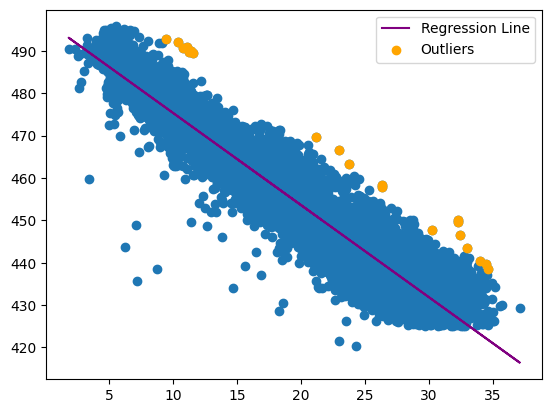


Outliers for AT based on Studentized Test Results


,student_resid,unadj_p,bonf(p)
202,3.455406,0.000552,1.000000
464,3.428586,0.000609,1.000000
611,3.329827,0.000872,1.000000
786,3.252832,0.001147,1.000000
887,3.155273,0.001608,1.000000
930,3.683900,0.000231,1.000000
2670,3.246997,0.001170,1.000000
2912,3.338973,0.000844,1.000000
3522,3.320779,0.000901,1.000000
4325,4.290182,0.000018,0.172494


In [7]:
x_outliers = x_1[outleirs.index]
y_outliers = y[outleirs.index]
plt.scatter(x_1, y)
plt.plot(x_1, y_1_prediction, color='purple', label='Regression Line')
plt.scatter(x_outliers, y_outliers, color='orange', label='Outliers')
plt.legend(loc='best')
plt.show()
print()
print("Outliers for AT based on Studentized Test Results")
outleirs

V

In [8]:
res_2 = sm.OLS(y, x_2_c).fit()
y_2_prediction = res_2.predict(x_2_c)
outlier_result2 = res_2.outlier_test()
outleirs_2 = outlier_result2[outlier_result2.iloc[:, 0] > 3]
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:12   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

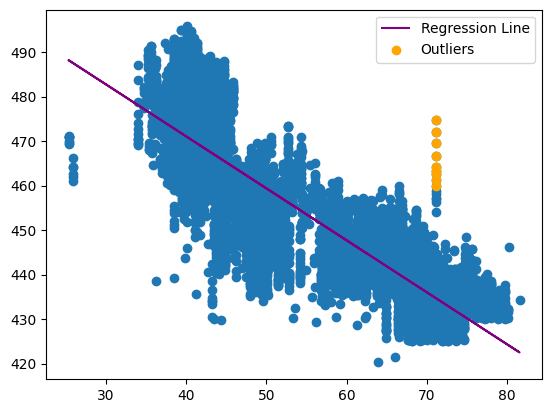


Outliers for V based on Studentized Test Results


,student_resid,unadj_p,bonf(p)
182,3.786100,0.000154,1.000000
1709,4.432613,0.000009,0.090069
1773,3.146028,0.001660,1.000000
3103,4.750720,0.000002,0.019676
5418,3.008075,0.002636,1.000000
5555,3.388680,0.000705,1.000000
6848,4.152748,0.000033,0.317044
8002,3.502890,0.000462,1.000000
8609,3.304220,0.000956,1.000000


In [9]:
x2_outliers = x_2[outleirs_2.index]
y2_outliers = y[outleirs_2.index]
plt.scatter(x_2, y)
plt.plot(x_2, y_2_prediction, color='purple', label='Regression Line')
plt.scatter(x2_outliers, y2_outliers, color='orange', label='Outliers')
plt.legend(loc='best')
plt.show()
print()
print("Outliers for V based on Studentized Test Results")
outleirs_2

AP

In [10]:
res_3 = sm.OLS(y, x_3_c).fit()
y_3_prediction = res_3.predict(x_3_c)
outlier_result3 = res_3.outlier_test()
outleirs_3 = outlier_result3[outlier_result3.iloc[:, 0] > 3]
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:26   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

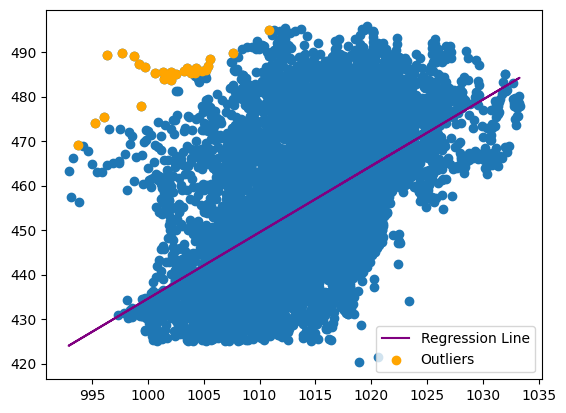


Outliers for AP based on Studentized Test Results


,student_resid,unadj_p,bonf(p)
618,3.180763,0.001474,1.000000
1091,3.185185,0.001451,1.000000
1290,4.133681,0.000036,0.344492
1662,3.588967,0.000334,1.000000
1735,3.285757,0.001021,1.000000
1796,3.030731,0.002446,1.000000
1907,3.861804,0.000113,1.000000
1996,3.163810,0.001562,1.000000
2047,3.234948,0.001221,1.000000
2776,3.119031,0.001820,1.000000


In [11]:
x3_outliers = x_3[outleirs_3.index]
y3_outliers = y[outleirs_3.index]
plt.scatter(x_3, y)
plt.plot(x_3, y_3_prediction, color='purple', label='Regression Line')
plt.scatter(x3_outliers, y3_outliers, color='orange', label='Outliers')
plt.legend(loc='best')
plt.show()
print()
print("Outliers for AP based on Studentized Test Results")
outleirs_3

RH

In [12]:
res_4 = sm.OLS(y, x_4_c).fit()
y_4_prediction = res_4.predict(x_4_c)
outlier_result4 = res_4.outlier_test()
outleirs_4 = outlier_result4[outlier_result4.iloc[:, 0] > 3]
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:41   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

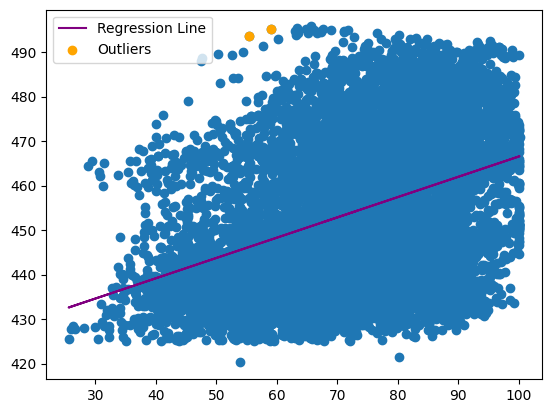


Outliers for RH based on Studentized Test Results


,student_resid,unadj_p,bonf(p)
4719,3.015318,0.002574,1.0
7900,3.023530,0.002505,1.0


In [13]:
x4_outliers = x_4[outleirs_4.index]
y4_outliers = y[outleirs_4.index]
plt.scatter(x_4, y)
plt.plot(x_4, y_4_prediction, color='purple', label='Regression Line')
plt.scatter(x4_outliers, y4_outliers, color='orange', label='Outliers')
plt.legend(loc='best')
plt.show()
print()
print("Outliers for RH based on Studentized Test Results")
outleirs_4

Statement:
If p > |t| is smaller than 0.05, it is the cutoff to reject null hypothesis and approve statistically significant. 
Therefore, we can say all the following predictors (AT, V, AP, RH) are statistically significant.

Statment:
If studentized residual value for a data point is more than 3 then it can be counted as an outlier. 
Therefore, based on the outlier test results we can state that all predictors have some outliers we can remove.

### (d) Multiple Regression


In [14]:
predictor = df[['AT', 'V', 'AP', 'RH']]
predictor_c = sm.add_constant(predictor)
response = df['PE']

model_multiple = sm.OLS(response, predictor_c).fit()
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:41   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Statement:
If p > |t| is smaller than 0.05, it is the cutoff to reject null hypothesis and approve statistically significant. 
Therefore, for all of the following predictors (AT, V, AP, RH) we can reject the null hypothesis.

### (e) 1c Compare to 1d


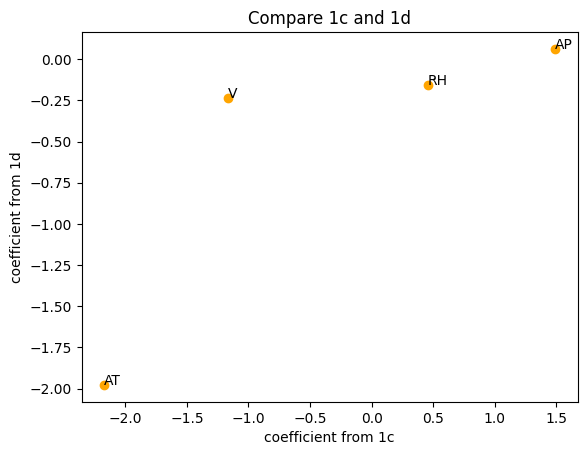

In [15]:
x_a = res_1.params[1]
x_b = res_2.params[1]
x_c = res_3.params[1]
x_d = res_4.params[1]

y_1 = model_multiple.params[1]
y_2 = model_multiple.params[2]
y_3 = model_multiple.params[3]
y_4 = model_multiple.params[4]

x = [x_a, x_b, x_c, x_d]
y = [y_1, y_2, y_3, y_4]

plt.title('Compare 1c and 1d')
plt.xlabel('coefficient from 1c')
plt.ylabel('coefficient from 1d')

plt.text(x_a, y_1, 'AT', fontsize = 10)
plt.text(x_b, y_2, 'V', fontsize = 10)
plt.text(x_c, y_3, 'AP', fontsize = 10)
plt.text(x_d, y_4, 'RH', fontsize = 10)

plt.scatter(x, y, c ='orange')
plt.show()

### (f) Nonlinear Association


Feature AT

In [29]:
model_at_non_linear = ols(formula="PE ~ AT + np.power(AT,2) + np.power(AT,3)", data=df).fit()
print(model_at_non_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:38:35   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         492.7281      0.673    7

Statement:
If p > |t| is smaller than 0.05, it is the cutoff to reject null hypothesis and approve statistically significant. 
Therefore, non-linears(AT, AT^2, AT^3) are statistically significant.

Feature V

In [30]:
model_v_non_linear = ols(formula="PE ~ V + np.power(V,2) + np.power(V,3)", data=df).fit()
print(model_v_non_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:38:43   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        554.1468      9.151     60.

Statement:
If p > |t| is smaller than 0.05, it is the cutoff to reject null hypothesis and approve statistically significant. 
Therefore, non-linears(V, V^3) are statistically significant. However, V^2 is not statistically significant.

Feature AP

In [31]:
model_ap_non_linear = ols(formula="PE ~ AP + np.power(AP,2) + np.power(AP,3)", data=df).fit()
print(model_ap_non_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:38:52   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0747      0.009     

Statement:
If p > |t| is smaller than 0.05, it is the cutoff to reject null hypothesis and approve statistically significant. 
Therefore, non-linears(AP, AP^2, AP^3) are statistically significant.

Feature RH

In [32]:
model_rh_non_linear = ols(formula="PE ~ RH + np.power(RH,2) + np.power(RH,3)", data=df).fit()
print(model_rh_non_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:39:01   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         468.4135     10.545     

Statement:
If p > |t| is smaller than 0.05, it is the cutoff to reject null hypothesis and approve statistically significant. 
Therefore, non-linears(RH, RH^2, RH^3) are statistically significant.

### (g) Interactions of Predictors


In [20]:
model_interaction = ols(formula="PE ~ AT+ V + AP + RH + AT:V + AT:RH + AT:AP + V:AP + V:RH + AP:RH ", data=df).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:42   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Statement:
If p > |t| is smaller than 0.05, it is the cutoff to reject null hypothesis and approve statistically significant. 
Therefore, interaction(AT:V, AT:RH, V:AP, AP:RH) are statistically significant.

### (h) Improvement


In [21]:
x = df.iloc[:, 0:4]
y = df.loc[:,'PE']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Training model
X_train_res = sm.add_constant(X_train)
X_test_res = sm.add_constant(X_test)
train_model = sm.OLS(y_train, X_train_res).fit()

# Predicting 
predicted_testing_y = train_model.predict(X_test_res)
predicted_training_y = train_model.predict(X_train_res)

#MSE
y_true = y_test
y_pred = predicted_testing_y
#test MSE
test_MSE = mean_squared_error(y_true, y_pred)
#train MSE
train_MSE = mean_squared_error(y_train, predicted_training_y)

print('The test MSE is', test_MSE)
print('The train MSE is', train_MSE)
print()
print(train_model.summary())

The test MSE is 21.009872469691242
The train MSE is 20.666425407782217

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.206e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:42   Log-Likelihood:                -19644.
No. Observations:                6697   AIC:                         3.930e+04
Df Residuals:                    6692   BIC:                         3.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

Interaction and quadratic nonlinearities

In [22]:
# Linear regression formula
# model = ols(formula="PE ~ AT + V + RH + AP", data=df)
# res_train = model.fit()
# print(res_train.summary())

# model_interaction = ols(formula="PE ~ AT * V * RH * AP", data=df)
training_def = pd.concat([X_train_res,y_train],axis=1)
model_intera_quad= ols(formula="PE ~ AT+ V + AP + RH + AT:V + AT:RH + AT:AP + V:AP + V:RH + AP:RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2)", data=training_def).fit()

test_prediction_y_intera_quad = model_intera_quad.predict(X_test_res)
train_prediction_y_intera_quad = model_intera_quad.predict(X_train_res)

mse_interaction_test = mean_squared_error(y_true, test_prediction_y_intera_quad)
mse_interaction_train = mean_squared_error(y_train, train_prediction_y_intera_quad)

print("The test mean squared error is: ", mse_interaction_test)
print("The train mean squared error is: ", mse_interaction_train)
print()
print(model_intera_quad.summary())

The test mean squared error is:  18.57933866390368
The train mean squared error is:  17.916700095375973

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7334.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:42   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.836e+04
Df Residuals:                    6682   BIC:                         3.846e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Backward Selection

In [23]:
max_p = max(model_intera_quad.pvalues)
backward_formula = "PE ~ AT + V + AP + RH + AT:V + AT:RH + AT:AP + V:AP + V:RH + AP:RH + np.power(AT, 2) + np.power(V, 2) + np.power(AP, 2) + np.power(RH, 2)"
while max_p >= 0.05:
    split_formula = backward_formula.split(' ~ ')
    predictors = split_formula[1].split(' + ')
    model_backward = ols(formula=backward_formula, data=training_def).fit()
    p_values = model_backward.pvalues[1:]
    max_p = max(p_values)
    if max_p > 0.05:
        excluded_predictors = p_values.idxmax()
        predictors.remove(excluded_predictors)
        backward_formula = split_formula[0] + " ~ " + ' + '.join(predictors)
    else:
        break

test_prediction_y_backward = model_intera_quad.predict(X_test_res)
train_prediction_y_backward = model_intera_quad.predict(X_train_res)

mse_backward_test = mean_squared_error(y_true, test_prediction_y_backward)
mse_backward_train = mean_squared_error(y_train, train_prediction_y_backward)
print("The test mean squared error is: ", mse_backward_test)
print("The train mean squared error is: ",mse_backward_train)
print()
print(model_backward.summary())

The test mean squared error is:  18.57933866390368
The train mean squared error is:  17.916700095375973

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9334.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:42   Log-Likelihood:                -19167.
No. Observations:                6697   AIC:                         3.836e+04
Df Residuals:                    6685   BIC:                         3.844e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------

### (i) KNN


The MSE of the test data are: 17.015922252873565
The MSE of the train data are: 0.0



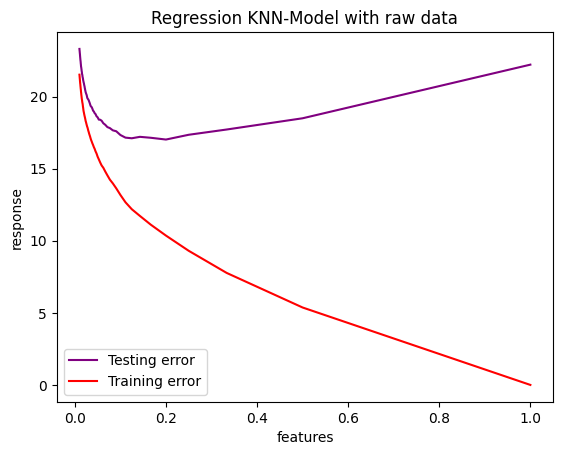

In [24]:
# raw data
# create empty lists to append test errors
train_error_list= []
test_error_list= []

k_list = list(range(1, 100))
for k in k_list: 
    knn_model = KNeighborsRegressor(n_neighbors=k, p=2)
    # Fit Model
    knn_model.fit(X_train, y_train)
    # Predicting 
    predicted_testing_y = knn_model.predict(X_test)
    predicted_training_y = knn_model.predict(X_train)

    mse_knn_test = mean_squared_error(y_true, predicted_testing_y)
    mse_knn_train = mean_squared_error(y_train, predicted_training_y)

    test_error_list.append(mse_knn_test)
    train_error_list.append(mse_knn_train)

print('The MSE of the test data are:', min(test_error_list))
print('The MSE of the train data are:', min(train_error_list))
print()
k_1 = 1/np.array(k_list)

# plot knn graph
plt.title('Regression KNN-Model with raw data')
plt.plot(k_1, test_error_list, color = 'purple', label = 'Testing error')
plt.plot(k_1, train_error_list, color = 'red', label = 'Training error')
plt.legend(loc='best')
plt.xlabel('features')
plt.ylabel('response')
plt.show()


The MSE of the test data when x is normalized are: 16.904746542127825
The MSE of the train data x is normalized are: 0.0



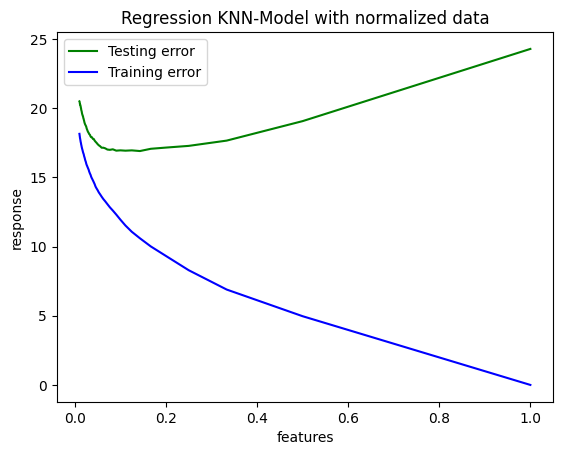

In [25]:

#Normalize training data
x_set = X_train
max_value = x_set.max()
min_value = x_set.min()
normalizer = (x_set - min_value) / (max_value - min_value)
x = normalizer

# Normalize testing data
x_test_n = X_test
max_value = x_test_n.max()
min_value = x_test_n.min()
x_test_normalize = (x_test_n - min_value) / (max_value - min_value)


train_error_list_nor= []
test_error_list_nor= []
k_list = list(range(1, 100))
for k in k_list: 
    knn_model = KNeighborsRegressor(n_neighbors=k, p=2)
    # Fit Model
    knn_model.fit(x, y_train)
    # Predicting 
    predicted_testing_y = knn_model.predict(x_test_normalize)
    predicted_training_y = knn_model.predict(x)

    mse_knn_test_n = mean_squared_error(y_true, predicted_testing_y)
    mse_knn_train_n = mean_squared_error(y_train, predicted_training_y)

    test_error_list_nor.append(mse_knn_test_n)
    train_error_list_nor.append(mse_knn_train_n)


print('The MSE of the test data when x is normalized are:', min(test_error_list_nor))
print('The MSE of the train data x is normalized are:', min(train_error_list_nor))
print()

# plot knn graph
plt.title('Regression KNN-Model with normalized data')
plt.plot(k_1, test_error_list_nor, color = 'green', label = 'Testing error')
plt.plot(k_1, train_error_list_nor, color = 'blue', label = 'Training error')
plt.legend(loc='best')
plt.xlabel('features')
plt.ylabel('response')
plt.show()

### (j ) Compare KNN and Linear


In [26]:
compare_MSE = {'error type': ['the least test error', 'the least train error'], 
               'KNN with raw data': [ min(test_error_list), min(train_error_list)],
               'KNN with normalized': [ min(test_error_list_nor), min(train_error_list_nor)],
               'Linear regression':[test_MSE.min(), train_MSE.min()],
               'Interaction linear': [mse_interaction_test.min(), mse_interaction_train.min()],
               'Backward Selection': [mse_backward_test.min(), mse_backward_train.min()],}

table_print = pd.DataFrame(compare_MSE)
table_print

,error type,KNN with raw data,KNN with normalized,Linear regression,Interaction linear,Backward Selection
0,the least test error,17.015922,16.904747,21.009872,18.579339,18.579339
1,the least train error,0.000000,0.000000,20.666425,17.916700,17.916700


## 2. ISLR: 2.4.1


### (a) The sample size n is extremely large, and the number of predictors p is small.


Better.
If the sample size n is extremely large and the number of predictors p is small, the flexible method is better. When the sample size is large enough and even close to the population, a flexible statistical learning method can fit data better and show more precise description about the distribution.

### (b) The number of predictors p is extremely large, and the number of observations n is small.


Worse.
When the nuumber of observation n is small and the number of predictor is extremely large, the flexible statistical learning menthod would be worse as the statistical learning method would overfit small sample size data.

### (c) The relationship between the predictors and response is highly non-linear.


Better.
The flexibile method has better performance when the relationship is highly non-linear as the flexible method can better depict the distribution in a wide range.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.


Worse.
A flexible statistical method will increase of the variance of error when the method try to fit each variable including error.

## 3. ISLR: 2.4.7


### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.


In [27]:
table = { 
         'X1': [0, 2, 0, 0, -1, 1],
         'X2': [3, 0, 1, 1, 0, 1],
        'X3':[0, 0, 3, 2, 1, 1],
        'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}

table_print = pd.DataFrame(table)
table_print

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


Distance:
1. 3
2. 2
3. Sqrt(10)
4. Sqrt(5)
5. Sqrt(2)
6. Sqrt(3)

### (b) What is our prediction with K = 1? Why?


Green

The closest neighbor when k = 1 to (0,0,0) is observation 5 with a distance of Sqrt(2). This observation is Green therefore our prediction will be Green.

### (c) What is our prediction with K = 3? Why?


Red

When k = 3, the closest neighbors are observation(2, 5, 6). Among these observations, the probability of red is 2/3 while the probability of green is 1/3. Therefore, our prediction will be Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?


K should be small

Highly non-linear, a flexible statistical model, will better fit a large sample size with the small number of k